# Finite Element Method

$$
\nabla^2 \phi + \nabla \cdot \left( \mathbf{\hat{u}} \phi \right) = \rho
$$
Multiply with test function $v$ and integrate over the domain
$$
\int_{\Omega} \left( \nabla^2 \phi + \nabla \cdot \left( \mathbf{\hat{u}} \phi \right) \right) v dV 
= 
\int_{\Omega} \rho v dV
$$
Integration by parts

$$
\int_{\Gamma} \left( \left(\nabla \phi + \mathbf{\hat{u}} \phi \right) v \right) \cdot \mathbf{\hat{n}} dS - \int_{\Omega} \left( \nabla \phi + \mathbf{\hat{u}} \phi \right) \cdot \nabla v dV
= 
\int_{\Omega} \rho v dV
$$

If we choose test function to vanish on the boundary
$$
v \bigm\lvert_{\Gamma}  = 0,
$$
then the first term will disappears, and we have
$$
- \int_{\Omega} \left( \nabla \phi + \mathbf{\hat{u}} \phi \right) \cdot \nabla v dV
= 
\int_{\Omega} \rho v dV
.$$
For a exact solution this must hold for any test function. However, here we choose a set of basis function and require that the solution must satisfy the equation for each of these basis functions
$$
- \int_{\Omega} \left( \nabla \phi + \mathbf{\hat{u}} \phi \right) \cdot \nabla v_i dV
= 
\int_{\Omega} \rho v_i dV
.$$
This is called the weak form.

Further we approximate the functions as weighted sums of the basis functions
$$
\phi = \sum_{i=0}^n \phi_i v_i
$$
and
$$
\rho = \sum_{i=0}^n \rho_i v_i
$$


$$
- \int_{\Omega} \left( \nabla \left( \sum_{j=0}^n \phi_j v_j \right) + \mathbf{\hat{u}} \left( \sum_{j=0}^n \phi_j v_j \right) \right) \cdot \nabla v_i dV
= 
\int_{\Omega} \left( \sum_{j=0}^n \rho_j v_j \right) v_i dV
.$$

$$
- \sum_{j=0}^n \phi_j \int_{\Omega} \left( \nabla v_j  + \mathbf{\hat{u}}  v_j  \right) \cdot \nabla v_i dV
= 
\sum_{j=0}^n \rho_j \int_{\Omega} v_j v_i dV
.$$

As test function we choose the set of the same basis functions $v_i , i \in 0..n$

Our original problem
$$
\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}=x
$$
ff
$$
\hat{F} =
\left[ \matrix{
f
\cr
f
} \right]
$$
Then we can write the differential equation as
$$
\nabla \cdot \hat{F} = \hat{i} \cdot \hat{r}
$$
test function and integrate over the whole area (volume)
$$
\int_{\Omega} v_i \nabla \cdot \hat{F} dV = \int_{\Omega} v_i \hat{i} \cdot \hat{r} dV
$$
By parts
$$
\int_{\Gamma} v_i \hat{F} \cdot \hat{n} dS - \int_{\Omega} \hat{F} \cdot \nabla v_i dV = \int_{\Omega} v_i x dV
$$
where $\Gamma$ is the boundary and $\Omega$ is the domain (area i 2D and volume in 3D)

By choosing test functions with
$$
v_i(\Gamma) = 0,
$$
meaning that the test functions are zero everywhere on the boundary, the first term vanishes.

In [1]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,1,1000)
xi=np.array([0,.2,.4,.5,.6,.80,1])

In [3]:
def phi(x,x0,xm,xp,v):
    ret=np.zeros_like(x)
    ret[(x>(xm)) & (x<=(x0))]=((x-xm)/(x0-xm)*v)[(x>(xm)) & (x<=(x0))]
    ret[(x<(xp)) & (x>(x0))]=((xp-x)/(xp-x0)*v)[(x<(xp)) & (x>(x0))]
    return(ret)

<IPython.core.display.Javascript object>


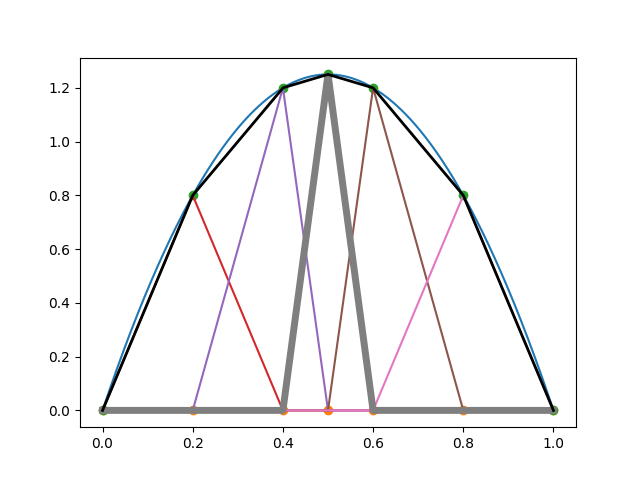

In [4]:
%matplotlib notebook
y=-5*(x-.5)*(x-.5)+1.25
yi=-5*(xi-.5)*(xi-.5)+1.25

plt.plot(x,y)
plt.plot(xi,np.zeros_like(xi),"o")
plt.plot(xi,yi,"o")

ll=np.zeros_like(x)
for i in range(1,len(xi)-1):
    if i==3:
        continue
    lf=phi(x,xi[i],xi[i-1],xi[i+1],yi[i])
    ll+=lf
    plt.plot(x,lf)

for i in [3]:
    lf=phi(x,xi[i],xi[i-1],xi[i+1],yi[i])
    ll+=lf
    plt.plot(x,lf,linewidth=5)
#    plt.plot(x,lf,"k",linewidth=1)
plt.plot(x,ll,"k",linewidth=2.0)
#plt.ylim(0,1.5)

In [5]:
nx=5
ny=5
x=np.linspace(0,1,nx)
y=np.linspace(0,1,ny)
vx,vy=np.meshgrid(x,y)

In [6]:
points=np.array([vx.flatten(),vy.flatten()]).T

In [7]:
tri=sc.spatial.Delaunay(points)

In [8]:
tri.points

array([[0.  , 0.  ],
       [0.25, 0.  ],
       [0.5 , 0.  ],
       [0.75, 0.  ],
       [1.  , 0.  ],
       [0.  , 0.25],
       [0.25, 0.25],
       [0.5 , 0.25],
       [0.75, 0.25],
       [1.  , 0.25],
       [0.  , 0.5 ],
       [0.25, 0.5 ],
       [0.5 , 0.5 ],
       [0.75, 0.5 ],
       [1.  , 0.5 ],
       [0.  , 0.75],
       [0.25, 0.75],
       [0.5 , 0.75],
       [0.75, 0.75],
       [1.  , 0.75],
       [0.  , 1.  ],
       [0.25, 1.  ],
       [0.5 , 1.  ],
       [0.75, 1.  ],
       [1.  , 1.  ]])

In [9]:
xi

array([0. , 0.2, 0.4, 0.5, 0.6, 0.8, 1. ])

In [10]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [11]:
a[[0,2]][:,[0,2]]

array([[1, 3],
       [7, 9]])

<IPython.core.display.Javascript object>


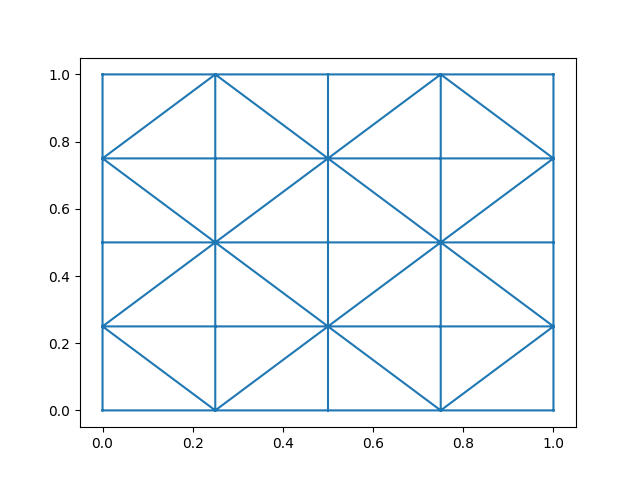

In [12]:
%matplotlib notebook
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())

In [13]:
elem=[]
for j in range(ny-1):
    for i in range(nx-1):
        elem.append([i+j*nx,i+j*nx+1,i+(j+1)*nx])
        elem.append([i+j*nx+1,i+(j+1)*nx+1,i+(j+1)*nx])
elem

[[0, 1, 5],
 [1, 6, 5],
 [1, 2, 6],
 [2, 7, 6],
 [2, 3, 7],
 [3, 8, 7],
 [3, 4, 8],
 [4, 9, 8],
 [5, 6, 10],
 [6, 11, 10],
 [6, 7, 11],
 [7, 12, 11],
 [7, 8, 12],
 [8, 13, 12],
 [8, 9, 13],
 [9, 14, 13],
 [10, 11, 15],
 [11, 16, 15],
 [11, 12, 16],
 [12, 17, 16],
 [12, 13, 17],
 [13, 18, 17],
 [13, 14, 18],
 [14, 19, 18],
 [15, 16, 20],
 [16, 21, 20],
 [16, 17, 21],
 [17, 22, 21],
 [17, 18, 22],
 [18, 23, 22],
 [18, 19, 23],
 [19, 24, 23]]

<IPython.core.display.Javascript object>


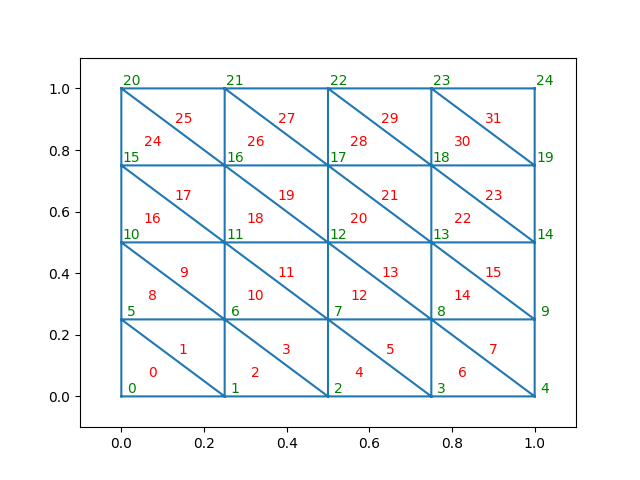

(-0.1, 1.1)

In [14]:
%matplotlib notebook
plt.triplot(points[:,0], points[:,1], elem)
for j in range(ny):
    for i in range(nx):
        plt.text(i/(nx-1)+.1/(nx-1),j/(ny-1)+.1/(ny-1),str(i+j*nx),color='green',verticalalignment='center', horizontalalignment='center')
for j in range(ny-1):
    for i in range(nx-1):
        plt.text(i/(nx-1)+.3/(nx-1),j/(ny-1)+.3/(ny-1),str(2*(i+j*(nx-1))),color='red',verticalalignment='center', horizontalalignment='center')
        plt.text(i/(nx-1)+.6/(nx-1),j/(ny-1)+.6/(ny-1),str(2*(i+j*(nx-1))+1),color='red',verticalalignment='center', horizontalalignment='center')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

In [15]:
import sympy
from sympy.abc import x,y,eta,xi,a,b,c,d
from sympy.matrices import Matrix
from IPython.display import display
sympy.init_printing()
x1,x2,x3,y1,y2,y3=sympy.symbols("x1 x2 x3 y1 y2 y3")
f=sympy.Function("f")
class impfun(sympy.Function):
    nargs = (1,2,3,4,5,6)

https://math.stackexchange.com/questions/424672/what-is-the-difference-between-finite-difference-methods-finite-element-methods/1984931

$$
x= \left( x_2-x_1 \right) \xi + \left( x_3-x_1 \right) \eta \\
y= \left( y_2-y_1 \right) \xi + \left( y_3-y_1 \right) \eta \\
f= \left( f_2-f_1 \right) \xi + \left( f_3-f_1 \right) \eta
$$
Blah bla
$$
\frac{\partial x}{\partial \xi} = x_2 - x_1 \\
\frac{\partial x}{\partial \eta} = x_3 - x_1 \\
\frac{\partial y}{\partial \xi} = y_2 - y_1 \\
\frac{\partial y}{\partial \eta} = y_3 - y_1 \\ 
\frac{\partial f}{\partial \xi} = f_2 - f_1 \\
\frac{\partial f}{\partial \eta} = f_2 - f_1  
$$
Blu blu
$$
\frac{\partial f}{\partial \xi} = \frac{\partial f}{\partial x}\frac{\partial x}{\partial \xi} + \frac{\partial f}{\partial y}\frac{\partial y}{\partial \xi} \\
\frac{\partial f}{\partial \eta} = \frac{\partial f}{\partial x}\frac{\partial x}{\partial \eta} + \frac{\partial f}{\partial y}\frac{\partial y}{\partial \eta} \\
$$
or written in matrix form

$$
\left[ \matrix{\frac{\partial f}{\partial \xi} \cr \frac{\partial f}{\partial \eta}} \right]
=
\left[ \matrix{
\frac{\partial x}{\partial \xi}
& 
\frac{\partial y}{\partial \xi}
\cr 
\frac{\partial x}{\partial \eta}
& 
\frac{\partial y}{\partial \eta}
} \right]
\left[ \matrix{
\frac{\partial f}{\partial x}
\cr
\frac{\partial f}{\partial y}
} \right]
$$

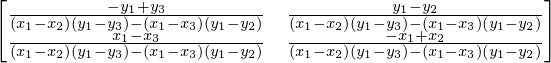

In [16]:

A=Matrix([[x2-x1,y2-y1],[x3-x1,y3-y1]])
sympy.simplify(A.inv())

In [17]:
f

f

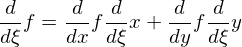

In [18]:
sympy.Eq(sympy.Derivative(f,xi),
         sympy.Derivative(f,x)*sympy.Derivative(x,xi)+sympy.Derivative(f,y)*sympy.Derivative(y,xi),evaluate=False)

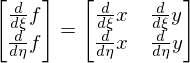

In [19]:
A = sympy.MatrixSymbol('A',5,5)
A.as_explicit()
B=1
sympy.Eq(Matrix([sympy.Derivative(f,xi),sympy.Derivative(f,eta)]),
         Matrix([[sympy.Derivative(x,xi),sympy.Derivative(y,xi)],[sympy.Derivative(x,eta),sympy.Derivative(y,eta)]]),
         evaluate=False)

In [20]:
f.fdiff(1)

AttributeError: 'int' object has no attribute 'args'

%matplotlib notebook
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())

In [ ]:
tri.simplices

In [ ]:
tri.points

In [ ]:
tri.neighbors

In [ ]:
tri.vertex_to_simplex

In [ ]:
np.array([vx.flatten(),vy.flatten()]).T

In [ ]:
x=np.linspace(0,1,1000)

In [ ]:
xi=np.linspace(0,1,11)

In [ ]:
x-0

In [ ]:
%matplotlib notebook

ll=np.zeros_like(x)
for i in [3,4,5]:
    lf=phi(x,.1*i,.1,1)
    ll+=lf
    plt.plot(x,lf)
#plt.ylim(0,1.5)

In [ ]:
%matplotlib notebook

ll=np.zeros_like(x)
for i in [1,2,3]:
    lf=phi(x,.1*2,.1,1)*phi(x,.1*i,.1,1)
    plt.plot(x,lf)

#plt.ylim(0,1.5)